In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [19]:
# Creating a sample dataset
np.random.seed(42)
data = np.random.normal(loc=50,scale=10, size=100) # Normal data with mean=5ø,
outliers= np.array([10, 110, 5, 120]) # outliers
data = np.concatenate( [data, outliers]) # Adding outliers to the dataset

In [20]:
# Creating a DataFrJme
df = pd.DataFrame(data,columns = ['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


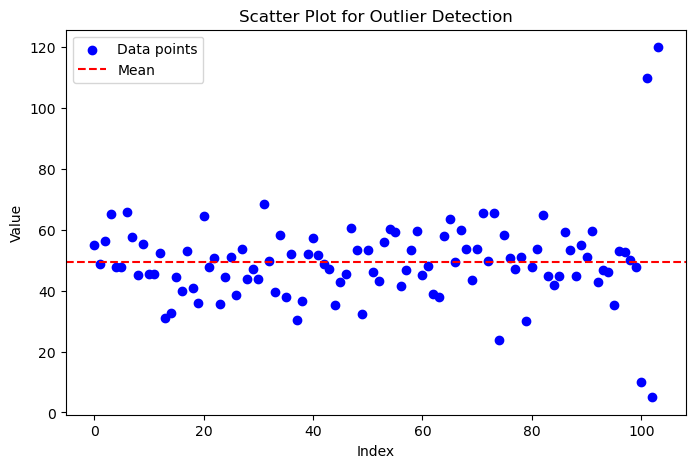

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color = 'blue',label = 'Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle ='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

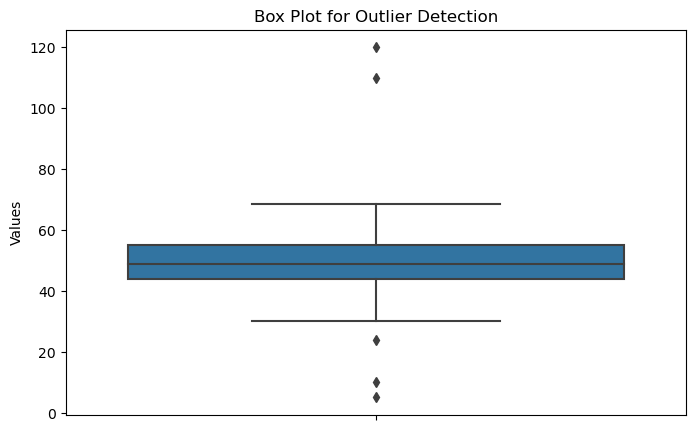

In [22]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df, y = 'Values')
plt.title("Box Plot for Outlier Detection")
plt.show()

In [23]:
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z'] == 'Outlier'])#Display detected outliers

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


Interquartile Range (IQR) Method 

The IQR formula is:

IQR = Q3 - QI
Steps:
1.Calculate QI (25th percentile) and Q3 (75th percentile).
2.Compute IQR = Q3 - QI.
3,Define lower & upper bounds:
** Lower Bound-Ql-1.5x1QR **
** Upper Bound-Q3+1.5x1QR **
4.Any value outside these bounds is an outlier.

In [26]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3-Q1

#Defining bounds 
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

#Identifying Outlier
df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')

print(df[df['Outlier_IQR'] == 'Outlier']) #Display detected outliers

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


# Final Summary

1 .Scatter Plot Outliers appear far from the main cluster.

2.Box Plot Outliers are outside the whiskers.

3.Z-Score Values with Z > 3 or Z < -3 are outliers.

4.1QR Method Values outside [QI - 1.5xlPR, Q3 + 1.5xlQR] are outliers.

## Finding Outliers Using the IQR Method with a 5-Number Summary The 5-number summary consists of:

Minimum (QO) The smallest value in the dataset.

First Quartile (QI) The 25th percentile (lower quartile).

Median (Q2) The 50th percentile (middle value).

Third Quartile (Q3) The 75th percentile (upper quartile).

Maximum (Q4) -+ The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
IQR=Q3-Q1

Any value outside the range:

[Q1 - 1.5*IQR , Q3 + 1.5*IQR] is considered an outlier

In [29]:
# Step 1: Create data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution (mean=50, std=10)
outliers = np.array([10,110,5, 120])  # Extreme values (outliers)
data = np.concatenate([data, outliers])  # Merge normal data with outliers

# Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)  # First Quartile (25th percentile)
Q2 = np.median(data)          # Median (50th percentile)
Q3 = np.percentile(data, 75)  # Third Quartile (75th percentile)
min_value = np.min(data)      # Minimum value
max_value = np.max(data)      # Maximum value

# Step 3: Compute IQR
IQR = Q3 - Q1

# Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Step 6: Print Results
print(f"5-Number Summary: \nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


5-Number Summary: 
Min: 5.0, Q1: 43.874401021766715, Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]
